# WORLD HAPPINESS REPORT ANALYSIS

###### Here, the dataset is based on the World Happiness Report.
###### The dataset is available as a CSV File. We're going to analyse this data using Pandas and Matplotlib.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

#### IMPORTING CSV FILE

In [3]:
df = pd.read_csv('World Happiness Report Dataset.csv', encoding= 'unicode_escape')

#### DATA EXPLORATION

In [5]:
df.shape

(158, 12)

In [6]:
df.head(10)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [8]:
pd.isnull(df).sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [9]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

### EXPLORATORY DATA ANALYSIS

#### Q1. Top 10 Happiest Country. 

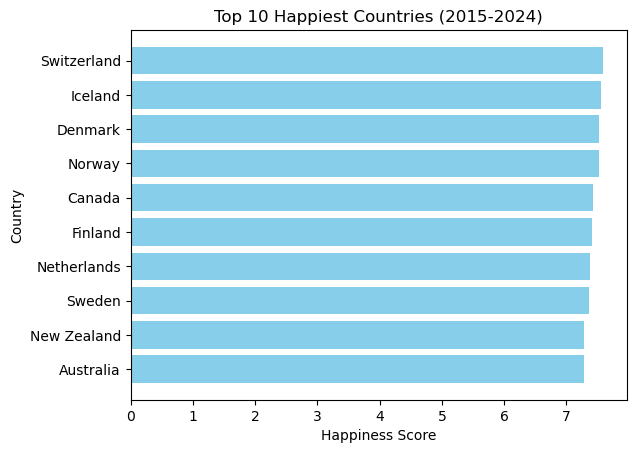

In [11]:
top10 = df.sort_values('Happiness Score', ascending=False).head(10)

plt.barh(top10['Country'], top10['Happiness Score'], color='skyblue')
plt.gca().invert_yaxis()
plt.title('Top 10 Happiest Countries (2015-2024)')
plt.xlabel('Happiness Score')
plt.ylabel('Country')
plt.show()

#### Q2. Average Happiness by Region

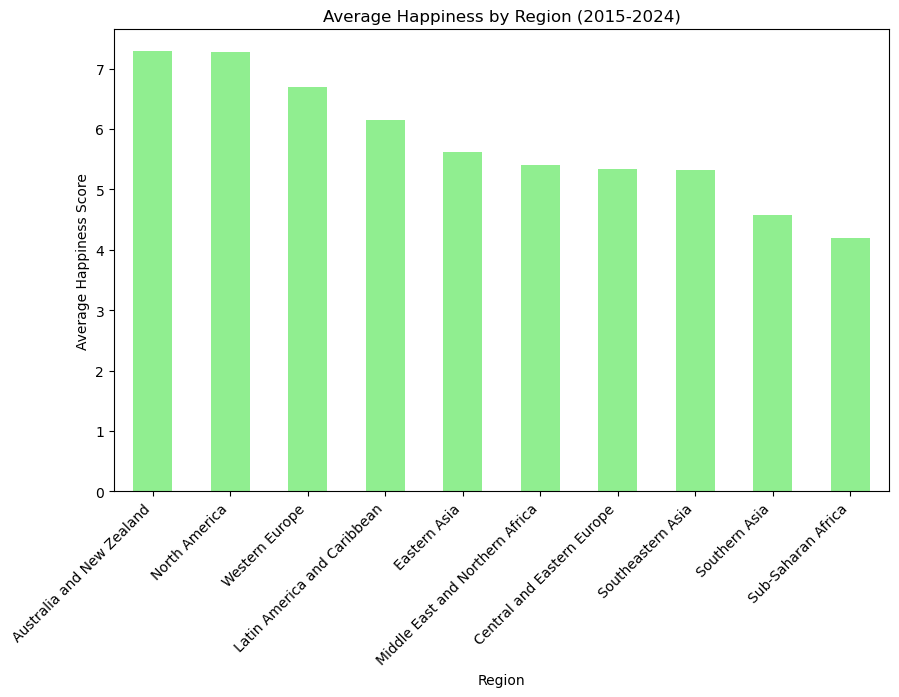

In [14]:
region_avg_happiness = df.groupby('Region')['Happiness Score'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
region_avg.plot(kind='bar', color='lightgreen')
plt.title('Average Happiness by Region (2015-2024)')
plt.xlabel('Region')
plt.ylabel('Average Happiness Score')
plt.xticks(rotation=45, ha='right')
plt.show()

#### Q3. Relation between GDP per Capita and Happiness Score.

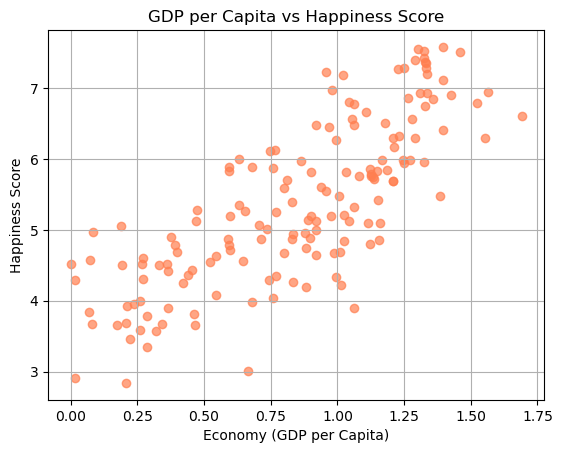

In [15]:
plt.scatter(df['Economy (GDP per Capita)'], df['Happiness Score'], color='coral', alpha=0.7)
plt.title('GDP per Capita vs Happiness Score')
plt.xlabel('Economy (GDP per Capita)')
plt.ylabel('Happiness Score')
plt.grid(True)
plt.show()

#### Q4. Find Top 5 Countries with highest Economy(GDP per Capita).

<Axes: title={'center': 'Top 5 Countries with highest GDP per Capita'}, xlabel='Country'>

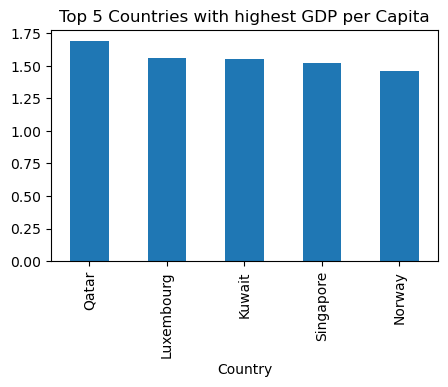

In [32]:
df.groupby('Country')['Economy (GDP per Capita)'].sum().sort_values(ascending=False).head(5).plot(kind='bar', figsize=(5,3), title='Top 5 Countries with highest GDP per Capita') 

#### Q5. Find out Countries with High Freedom but Low Happiness Score(Using Pandas Only).

<Axes: xlabel='Country'>

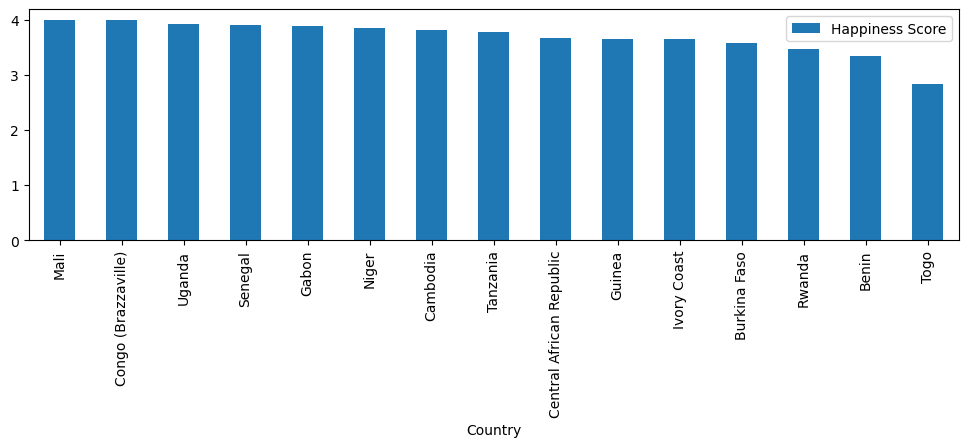

In [15]:
(df[ (df['Freedom'] > 0.3) & (df['Happiness Score'] < 4.0) ].plot(x='Country', y='Happiness Score', kind='bar', figsize=(12,3)))

#### Q6. Find out Countries with High Freedom but Low Happiness Score(Using MATPLOTLIB).

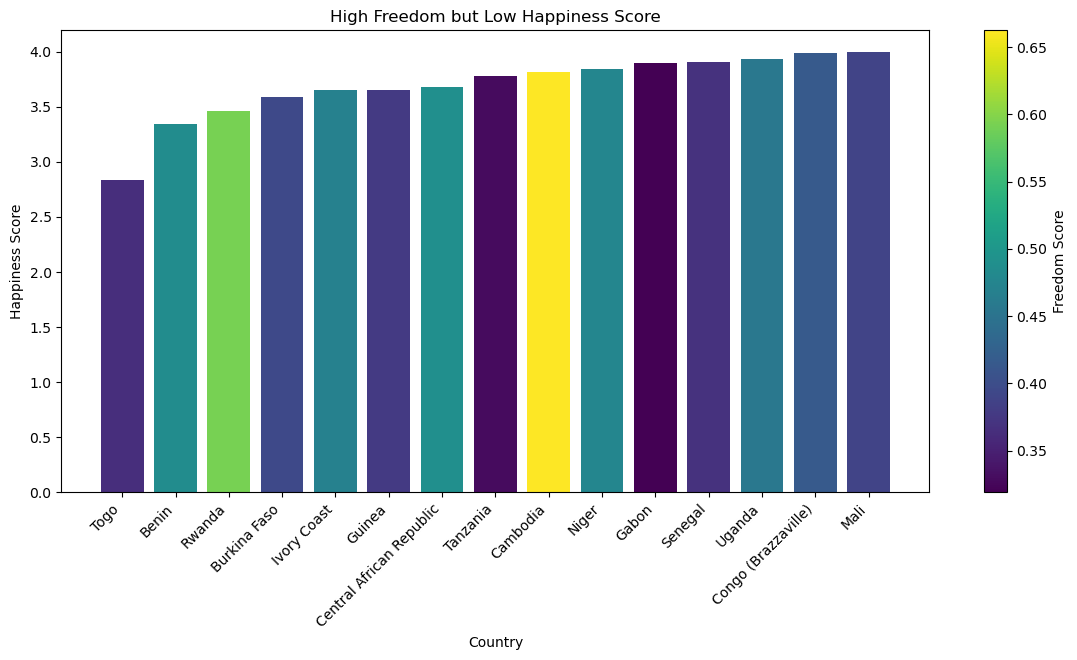

In [10]:
# 1. Define
result_df = df[(df['Freedom'] > 0.3) & (df['Happiness Score'] < 4.0)].sort_values(by='Happiness Score')

# 2. Setup the plot environment
fig, ax = plt.subplots(figsize=(14, 6))

# 3. Prepare colors based on the 'Freedom' score
norm = plt.Normalize(result_df['Freedom'].min(), result_df['Freedom'].max())
colors = plt.cm.viridis(norm(result_df['Freedom']))

# 4. Plot using the explicit ax.bar() function
ax.bar(result_df['Country'], result_df['Happiness Score'], color=colors)

# 5. Set labels, title, and formatting using ax.set() and plt.xticks()
ax.set(xlabel='Country', ylabel='Happiness Score', title='High Freedom but Low Happiness Score')
plt.xticks(rotation=45, ha='right')

# 6. Add the colorbar
sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=norm)
fig.colorbar(sm, ax=ax, label='Freedom Score')

#### Q7. Find out Countries with High Trust Level and Generosity.

<Axes: ylabel='Country'>

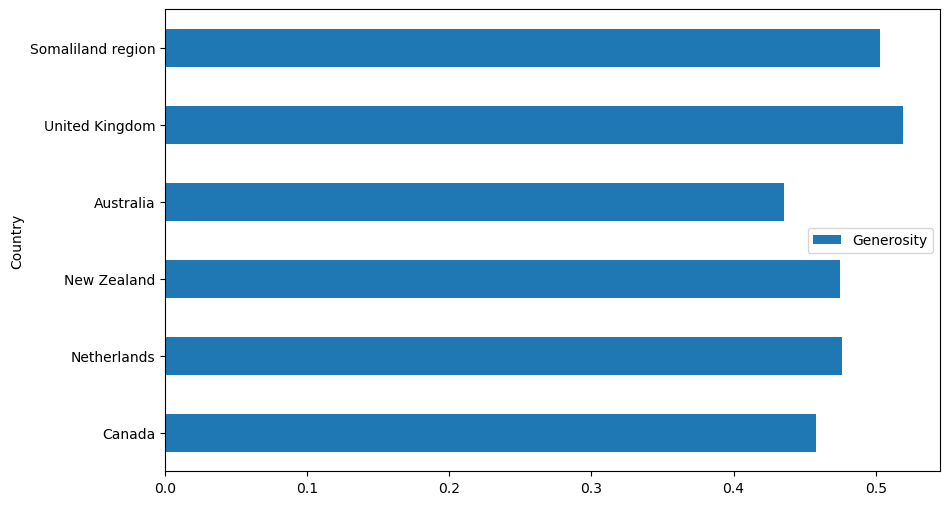

In [23]:
(df[ (df['Trust (Government Corruption)'] >= 0.3) & (df['Generosity'] >= 0.4) ].plot(x='Country', y='Generosity', kind='barh', figsize=(10,6)))

#### Q8. Find out the Countries with High Health (Life Expectancy) and Happiness Score.

<Axes: title={'center': 'Countries with High Health (Life Expectancy) and Happiness Score'}, ylabel='Country'>

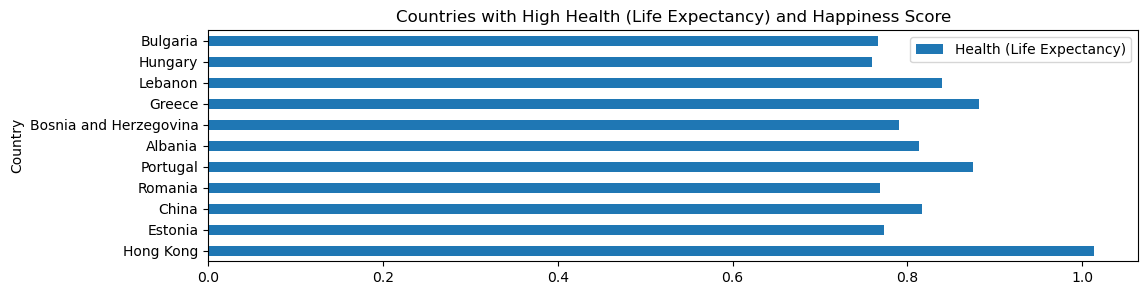

In [29]:
(df[ (df['Health (Life Expectancy)'] > 0.75) & (df['Happiness Score'] < 5.5) ].plot(x='Country', y='Health (Life Expectancy)', kind='barh', figsize=(12,3), title='Countries with High Health (Life Expectancy) and Happiness Score'))

#### Q9. Find out Countries with High Economy (GDP per Capita) but Low Happiness Score.

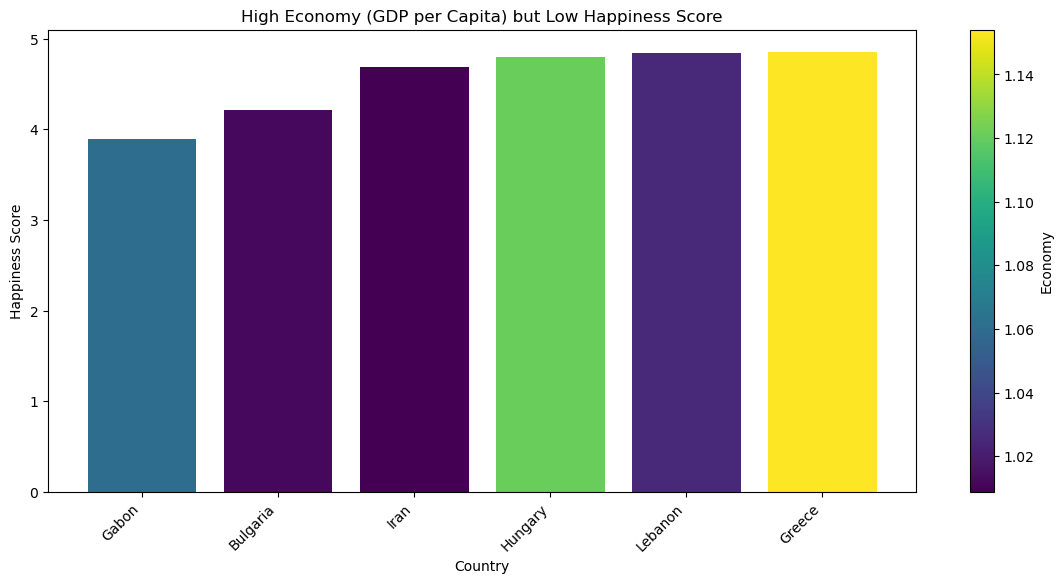

In [4]:
# 1. Define
result_df = df[(df['Economy (GDP per Capita)'] > 1.0) & (df['Happiness Score'] < 5.0)].sort_values(by='Happiness Score')

# 2. Setup the plot environment
fig, ax = plt.subplots(figsize=(14, 6))

# 3. Prepare colors based on the 'Freedom' score
norm = plt.Normalize(result_df['Economy (GDP per Capita)'].min(), result_df['Economy (GDP per Capita)'].max())
colors = plt.cm.viridis(norm(result_df['Economy (GDP per Capita)']))

# 4. Plot using the explicit ax.bar() function
ax.bar(result_df['Country'], result_df['Happiness Score'], color=colors)

# 5. Set labels, title, and formatting using ax.set() and plt.xticks()
ax.set(xlabel='Country', ylabel='Happiness Score', title='High Economy (GDP per Capita) but Low Happiness Score')
plt.xticks(rotation=45, ha='right')

# 6. Add the colorbar
sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=norm)
fig.colorbar(sm, ax=ax, label='Economy')

#### Q10. Top 10 Countries with Best Health (Life Expectancy).

<Axes: title={'center': 'Countries with Best Health (Life Expectancy)'}, ylabel='Country'>

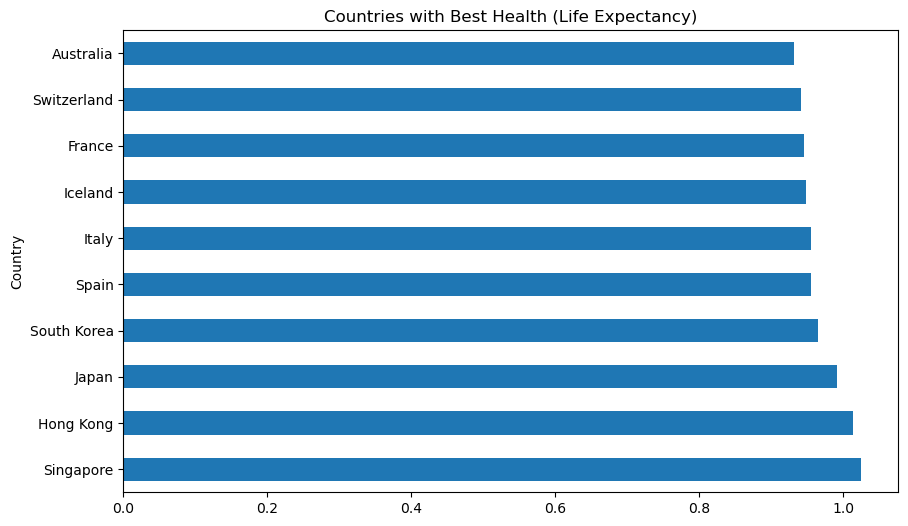

In [7]:
df.groupby('Country')['Health (Life Expectancy)'].sum().sort_values(ascending=False).head(10).plot(kind='barh', figsize=(10,6), title='Countries with Best Health (Life Expectancy)')

### THANK YOU!!!